[-0.53278301 -0.55022637  1.38862276  1.37033956 -0.88060639 -2.22746033
 -3.83660791 -0.26150033  1.18267985 -0.89113519 -3.42244116 -3.24159714
 -0.08144118  2.82215236  1.90632766  1.12041042  0.41265265 -1.61986103
  1.24676117 -2.0136214  -0.64851035  1.90763236 -0.7572648   2.18263294
  1.53216357  1.12431439  1.19440189 -2.43377785  0.35055007 -0.75207647
  0.83769501  1.86418091  2.07793008 -3.16320932  2.09100144 -1.51976189
  1.57354644 -1.23648559 -0.28925107  0.26095995  1.39785819 -0.82493081
 -1.63748148 -1.76520757  0.50148599  0.66536535 -1.05318015  0.60212054
 -0.87914241  0.3698062  -1.94963972  1.05673513  2.16363071 -0.4141638
 -0.04789388 -1.47904469 -1.01070298 -1.94651523 -2.76985304 -2.15069401
  0.80950287  2.56504894 -0.12118447 -1.60928556 -0.21530353 -1.57009042
  1.37655575 -1.99166131  1.75487048  1.0274433  -1.62140407  0.51631031
  0.61054651  0.10075428  0.81152483 -1.67455485  2.0728437  -1.06568358
  2.39559403  2.0020706   3.02306437 -0.39019608 -0.

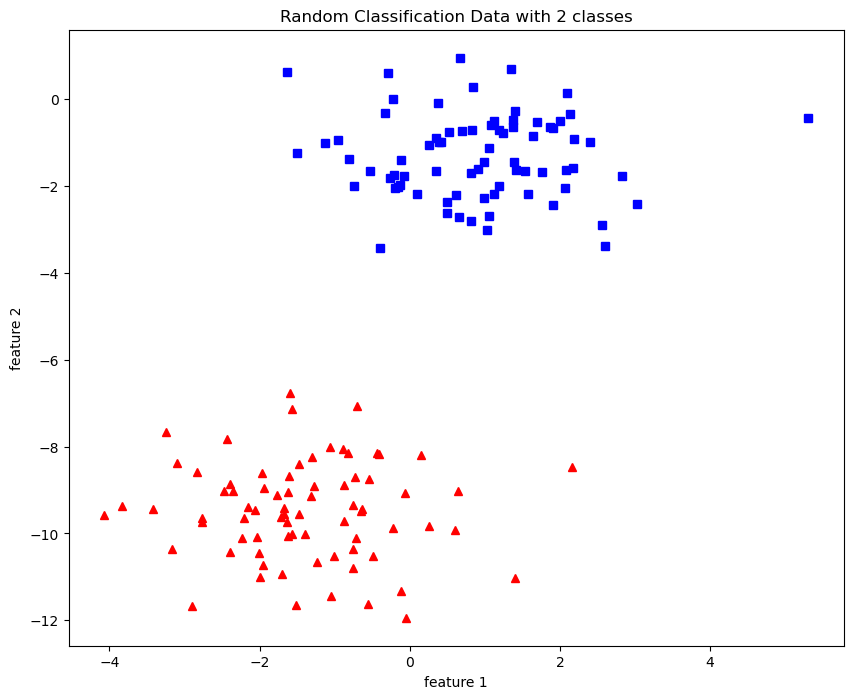

In [79]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
X, y = datasets.make_blobs (n_samples=150, n_features=2,
centers=2, cluster_std=1.05,
random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')


In [80]:
def acti_func(z):
    if(z>0):
        return 1
    else:
        return 0

In [117]:
def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.ones((n+1,1))
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
    # variable to store #misclassified.
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
    # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
    # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
    # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w=w+lr*(y[idx]-np.squeeze(y_hat))*x_i
    # Incrementing by 1.
    
                n_miss+=1
    # Appending number of misclassified examples
    # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list

In [118]:
def plot_decision_boundary(X, w):
# X --> Inputs
# w --> parameters
# The Line is y=mx+c
# So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
# Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -(w[1]/w[2])
    c = -w[0]/w[2]  
    x2 = m*x1 +c
    # Plotting
    plt.plot(x1,x2)
    plt.show()

[[1.47      ]
 [0.60488427]
 [0.34513315]]


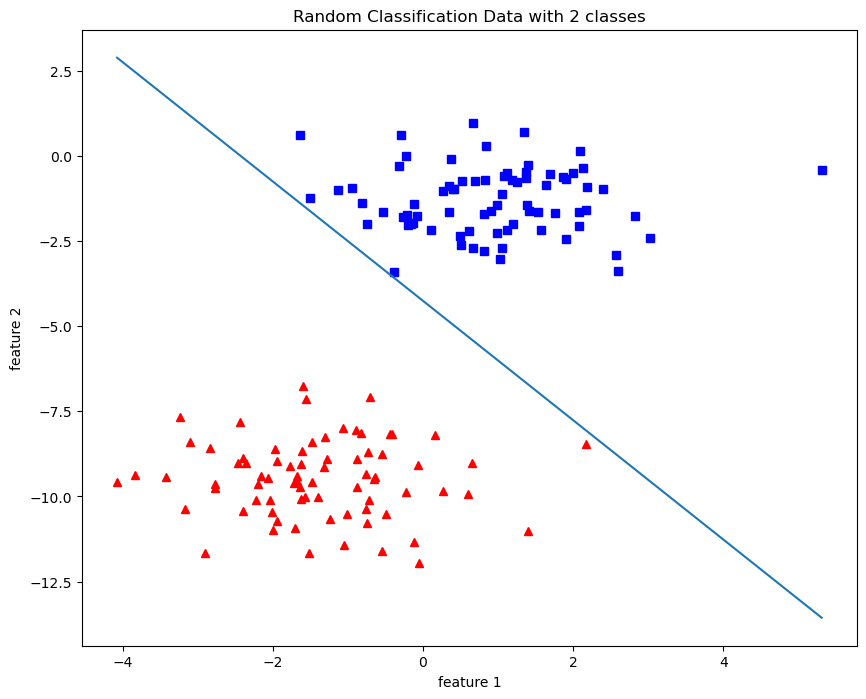

In [121]:
w,li= perceptron(X,y,0.01,1000)
print(w)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')   
plot_decision_boundary(X,w)

### Generation Data Fucntion

In [4]:
from sklearn.model_selection import train_test_split
def generate_dataset(sigma1,sigma2):
    mean1= (-1 , 0) #moyenne de la première distribution
    mean2= (1 , 0)  #moyenne de la deuxième distribution   
    x1=np.random.normal(mean1,sigma1,(125,2))
    x2=np.random.normal(mean2,sigma2,(125,2))
    y_first=np.ones((125,))
    y_last=np.zeros((125,))
    y=np.concatenate((y_first,y_last))
    x=np.concatenate((x1,x2))    
    return train_test_split(x,y,test_size=0.2,shuffle=True,random_state=1)
    
    
    

### Experience 1

In [6]:
import numpy as np
x_train_exp1, x_test_exp1, y_train_exp1, y_test_exp1 = generate_dataset(0.25,0.25)
w_1,converged = perceptron(x_train_exp1 , y_train_exp1,0.1, 1 )
plt.plot(x_train_exp1[:, 0][y_train_exp1 == 0], x_train_exp1[:, 1][y_train_exp1 == 0], 'r^')
plt.plot(x_train_exp1[:, 0][y_train_exp1 == 1], x_train_exp1[:, 1][y_train_exp1 == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
plt.ylim([-2,2])
plot_decision_boundary(x_train_exp1,w_1)

NameError: name 'perceptron' is not defined

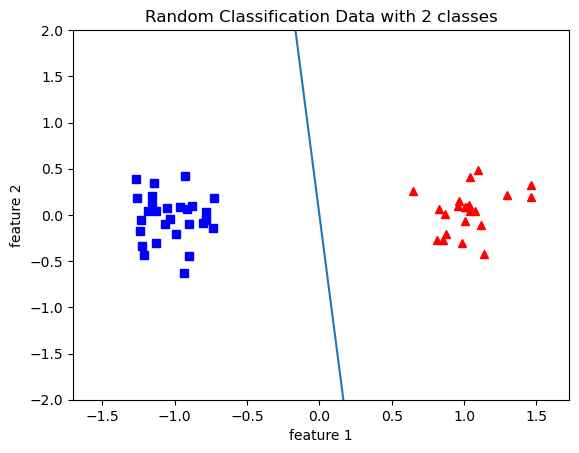

In [102]:
plt.plot(x_test_exp1[:, 0][y_test_exp1 == 0], x_test_exp1[:, 1][y_test_exp1 == 0], 'r^')
plt.plot(x_test_exp1[:, 0][y_test_exp1 == 1], x_test_exp1[:, 1][y_test_exp1 == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

plt.ylim([-2,2])
plot_decision_boundary(x_train_exp1,w_1)

Dans l'éxperince 1, les classes étaient bien séparés (car la variance est relativement faible). Donc la distance entre les classes etaient maximals. Alors la fonction perceptron sépare parfaitement les deux classes


Si on change l'initialisation du vecteur w du perceptron, le résultat ne change pas si le nombre d'iteration est suffisament grand, ca veut dire si la valeur intiale du vecteur w est tres differente de la valeur attendue alors l'algorithme va prendre plus d'iteration pour converger vers la valeur optimal (ca depend aussis du learning rate)

### Experience 2

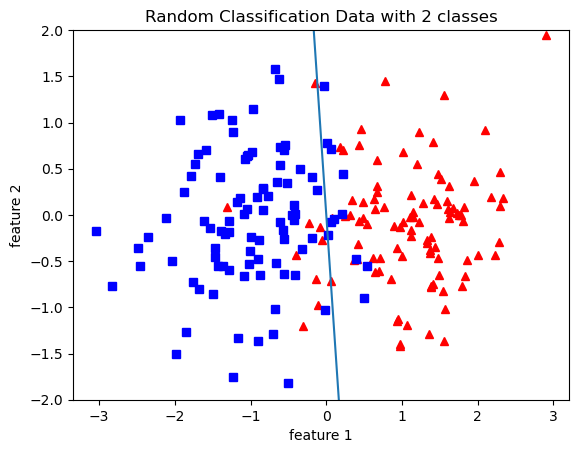

In [104]:
x_train_exp2, x_test_exp2, y_train_exp2, y_test_exp2 = generate_dataset(0.75,0.75)
w_2,converged = perceptron(x_train , y_train,0.1, 1 )
plt.plot(x_train_exp2[:, 0][y_train_exp2 == 0], x_train_exp2[:, 1][y_train_exp2 == 0], 'r^')
plt.plot(x_train_exp2[:, 0][y_train_exp2 == 1], x_train_exp2[:, 1][y_train_exp2 == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

plt.ylim([-2,2])
plot_decision_boundary(x_train_exp2,w_2)

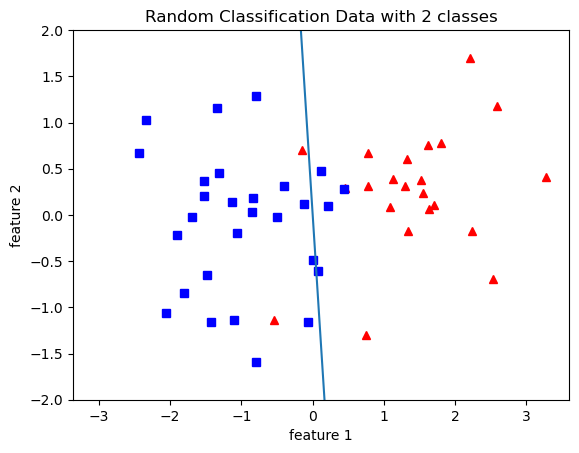

In [105]:
plt.plot(x_test_exp2[:, 0][y_test_exp2 == 0], x_test_exp2[:, 1][y_test_exp2 == 0], 'r^')
plt.plot(x_test_exp2[:, 0][y_test_exp2 == 1], x_test_exp2[:, 1][y_test_exp2 == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

plt.ylim([-2,2])
plot_decision_boundary(x_train_exp2,w_2)

Dans l'éxperience 2, la valeur de variance est plus grande donc on remarque que les deux classes sont plus difficiles à séparer


### Experience 3

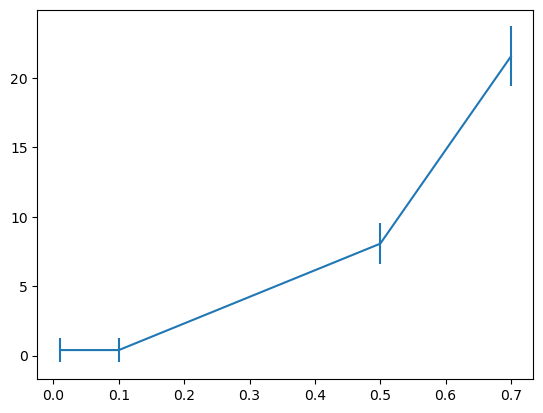

In [108]:
variance_values =[0.01,0.1,0.5,0.7]
final_mean_error=[]
final_std_error=[]


for sigma in variance_values:
    mean_error=[]
    std_error=[]
    
    for _ in range(30):
        
        x_train, x_test, y_train, y_test = generate_dataset(sigma,sigma)
        w,error = perceptron(x_train , y_train,0.1, 5 )
        mean_error.append(np.mean(error))
        std_error.append(np.std(error,ddof=1))
    final_mean_error.append(np.mean(mean_error))
    final_std_error.append(np.mean(std_error))
plt.errorbar(variance_values,final_mean_error,yerr=final_std_error)
plt.show()

ici on remarque que plus la variance augmente plus l'erreur que l'algorithme de perceptron f